## Import packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm


In [4]:
dta= sm.datasets.co2.load_pandas().data
dta

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [5]:
dta.co2.interpolate(inplace=True)
dta

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


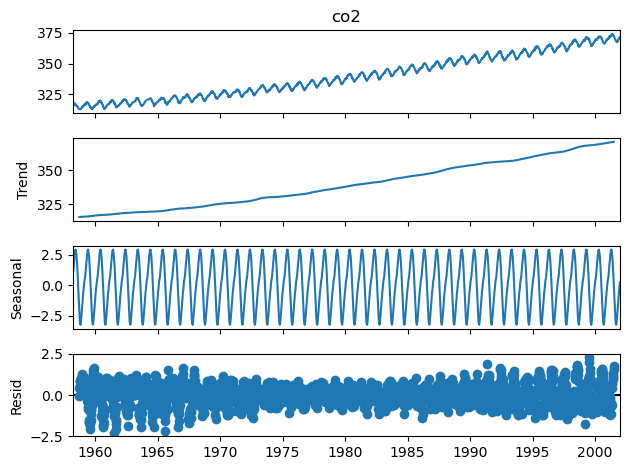

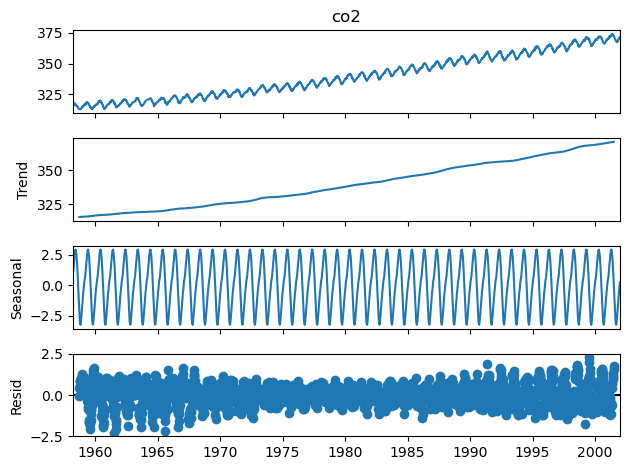

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
res= sm.tsa.seasonal_decompose(dta.co2)
res.plot()

## Loading the data set

In [7]:
df=pd.read_csv("monthly-milk-production-pounds-p.csv")
df

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
...,...,...
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


### Dropping unnecessary data

In [8]:
df.drop(168, axis=0, inplace= True)
df

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
...,...,...
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0


### Changing the column names

In [9]:
df.columns=("month", "Milk in pounds per cow")
df

,month,Milk in pounds per cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
...,...,...
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0


### Changing the data type of month coulumn

In [10]:
df["month"]=pd.to_datetime(df["month"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   month                   168 non-null    datetime64[ns]
 1   Milk in pounds per cow  168 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


### Changing the index to month

In [11]:
df.set_index("month",inplace=True)
df

,Milk in pounds per cow
month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
...,...
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0


In [12]:
timeseries = (df["Milk in pounds per cow"])
type(timeseries)

pandas.core.series.Series

### plotting the "Milk in pounds per cow"  column to see the data visually

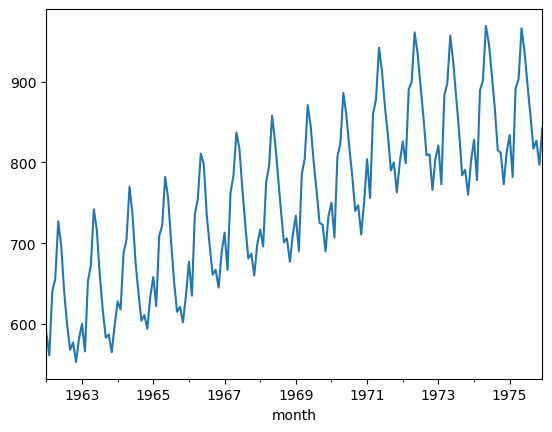

In [13]:
timeseries.plot()
plt.show()

### Seasonal

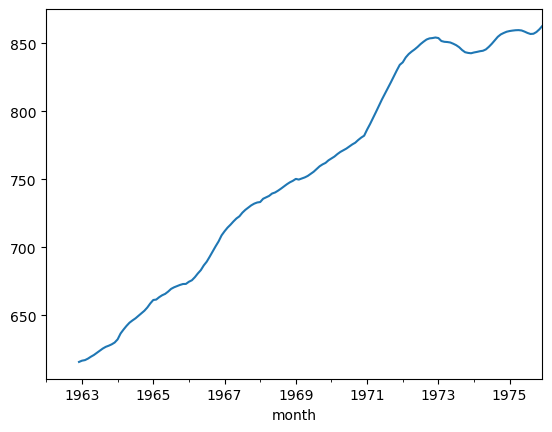

In [14]:
timeseries.rolling(12).mean().plot(label="12 months rolling mean")
plt.show()

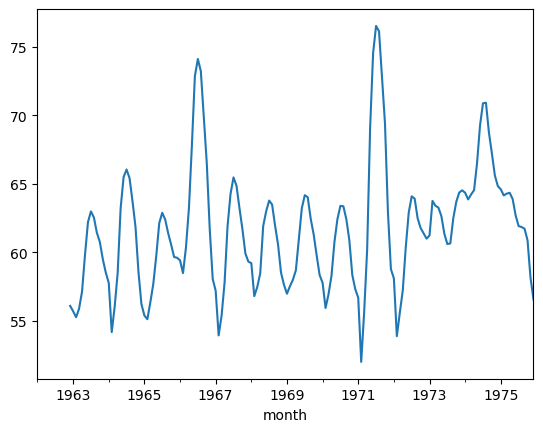

In [15]:
timeseries.rolling(12).std().plot(label="12 months rolling std")
plt.show()

### Plot the graph to check

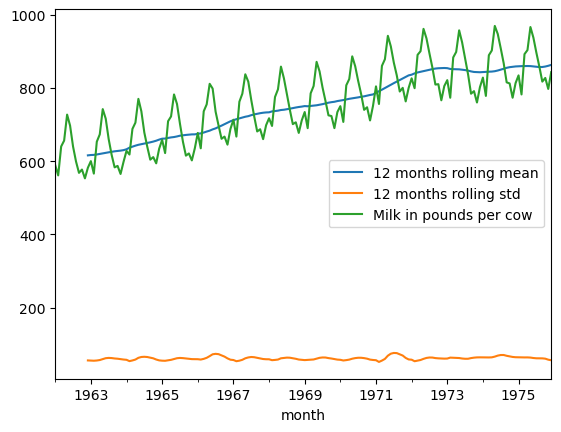

In [16]:
timeseries.rolling(12).mean().plot(label="12 months rolling mean")
timeseries.rolling(12).std().plot(label="12 months rolling std")
timeseries.plot()
plt.legend()
plt.show()

### We can see that "12 months rolling mean" & "12 months rolling mean" is very close

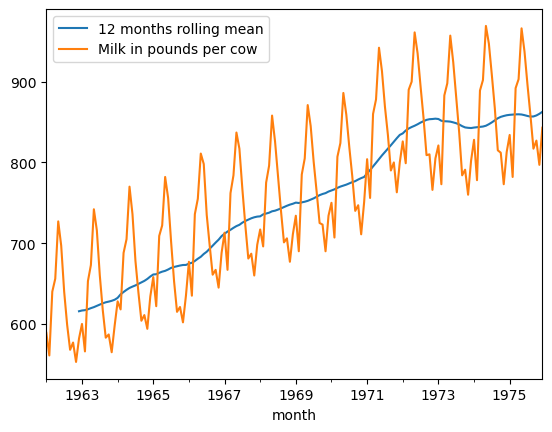

In [17]:
timeseries.rolling(12).mean().plot(label="12 months rolling mean")
timeseries.plot()
plt.legend()
plt.show()

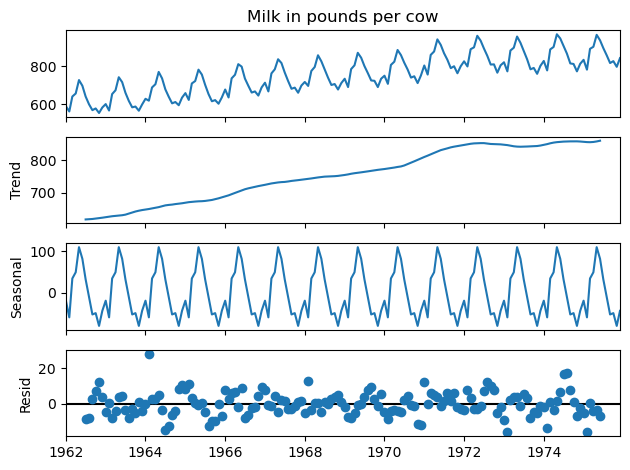

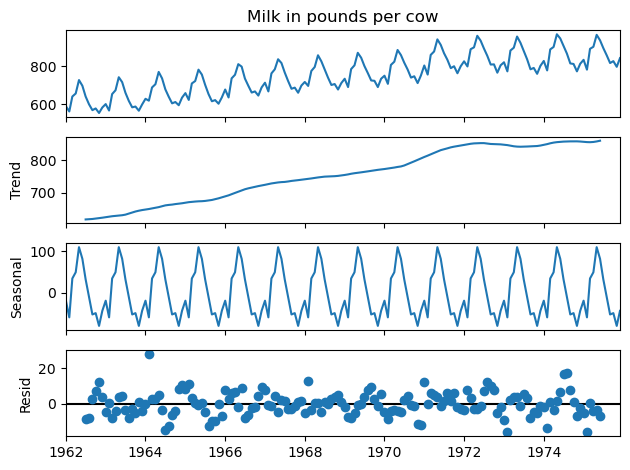

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df["Milk in pounds per cow"])
decomposition.plot()

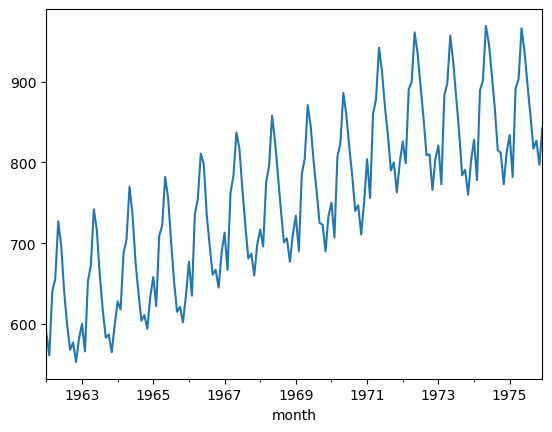

In [19]:
df["Milk in pounds per cow"].plot()
plt.show()

### LETS DO DICKEYFULLER TEST

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
timeseries = df["Milk in pounds per cow"]

In [22]:
def dicky_test(timeseries):
    print("decikey fuller test")
    result= adfuller(timeseries)
    label= ["ADF test statistics", " P-value", "Lags udes"," no. of observations used"]
    for value,labels in zip(result,label):
        print(labels,"- ",value)
        print("\n")
    
    if result[1] <=0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
dicky_test(timeseries)

decikey fuller test
ADF test statistics -  -1.3038115874221312


 P-value -  0.6274267086030308


Lags udes -  13


 no. of observations used -  154


weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### For first difference

In [23]:
df[" milk first difference"] = df["Milk in pounds per cow"] - df["Milk in pounds per cow"].shift(1)
df[" milk first difference"]

month
1962-01-01     NaN
1962-02-01   -28.0
1962-03-01    79.0
1962-04-01    16.0
1962-05-01    71.0
              ... 
1975-08-01   -38.0
1975-09-01   -41.0
1975-10-01    10.0
1975-11-01   -30.0
1975-12-01    46.0
Name:  milk first difference, Length: 168, dtype: float64

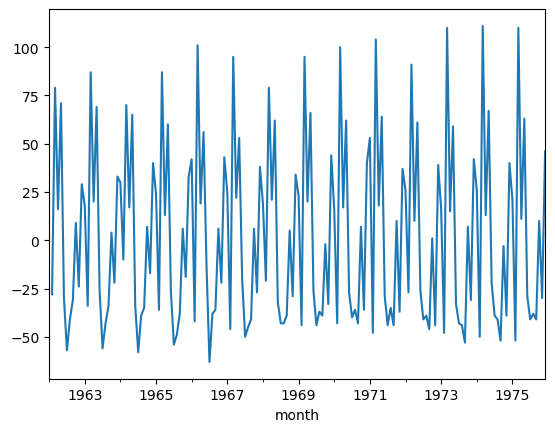

In [24]:
df[" milk first difference"].plot()
plt.show()

In [25]:
dicky_test(df[" milk first difference"].dropna()) # dropping the null values and performing dickey_fuller test

decikey fuller test
ADF test statistics -  -3.0549955586530544


 P-value -  0.03006800400178694


Lags udes -  14


 no. of observations used -  152


strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


### for seasonal difference

In [26]:
df["seasonal difference"] = df["Milk in pounds per cow"] - df["Milk in pounds per cow"].shift(12)
df["seasonal difference"]

month
1962-01-01     NaN
1962-02-01     NaN
1962-03-01     NaN
1962-04-01     NaN
1962-05-01     NaN
              ... 
1975-08-01    -9.0
1975-09-01     2.0
1975-10-01    15.0
1975-11-01    24.0
1975-12-01    30.0
Name: seasonal difference, Length: 168, dtype: float64

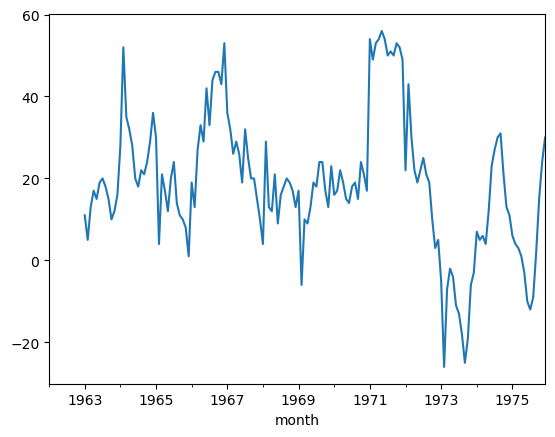

In [27]:
df["seasonal difference"].plot()
plt.show()

In [28]:
dicky_test(df["seasonal difference"].dropna()) # dropping the null values and performing dickey_fuller test

decikey fuller test
ADF test statistics -  -2.3354193143593953


 P-value -  0.1607988052771142


Lags udes -  12


 no. of observations used -  143


weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### for first seasonal difference

In [29]:
df["first seasonal difference"] = df[" milk first difference"] - df[" milk first difference"].shift(12)
df["first seasonal difference"]

month
1962-01-01     NaN
1962-02-01     NaN
1962-03-01     NaN
1962-04-01     NaN
1962-05-01     NaN
              ... 
1975-08-01     3.0
1975-09-01    11.0
1975-10-01    13.0
1975-11-01     9.0
1975-12-01     6.0
Name: first seasonal difference, Length: 168, dtype: float64

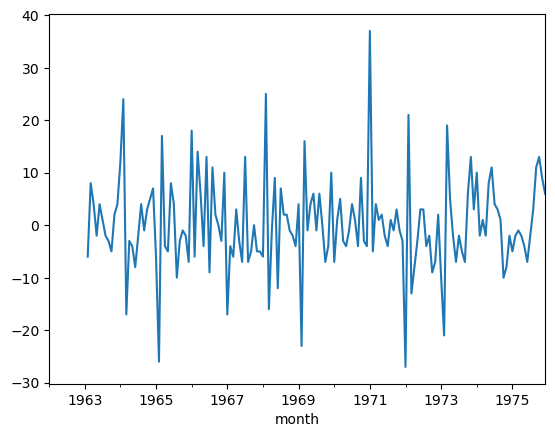

In [30]:
df["first seasonal difference"].plot()
plt.show()

In [31]:
dicky_test(df["first seasonal difference"].dropna()) # dropping the null values and performing dickey_fuller test

decikey fuller test
ADF test statistics -  -5.038002274921973


 P-value -  1.865423431878921e-05


Lags udes -  11


 no. of observations used -  143


strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


### lets plot acf, & pacf

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

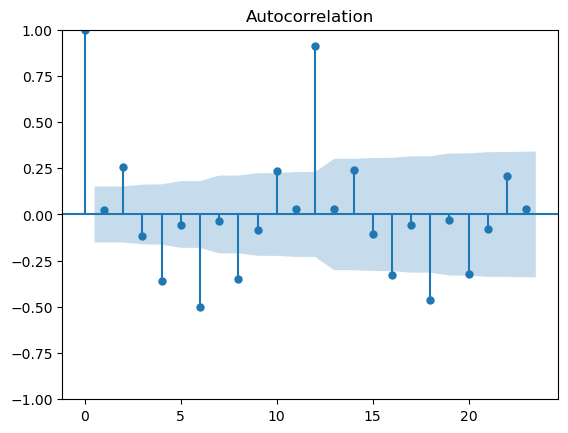

In [33]:
rjfjj=plot_acf(df[" milk first difference"].dropna())

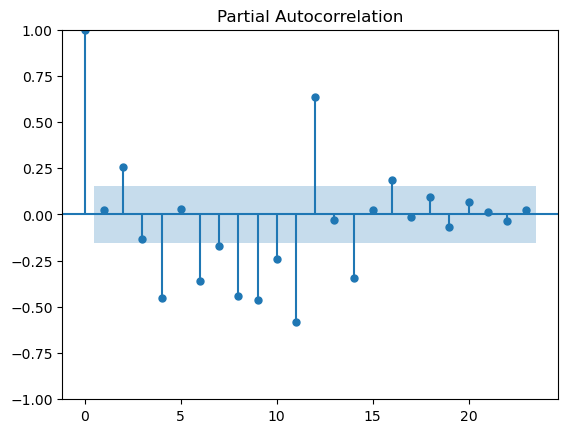

In [34]:
fig2=plot_pacf(df[" milk first difference"].dropna())

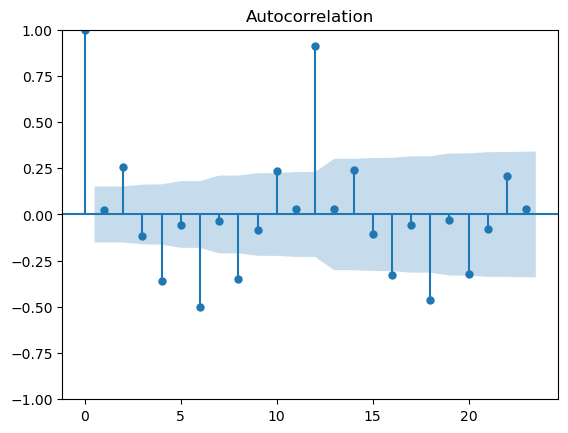

In [35]:
fig_first = plot_acf(df[" milk first difference"].dropna())

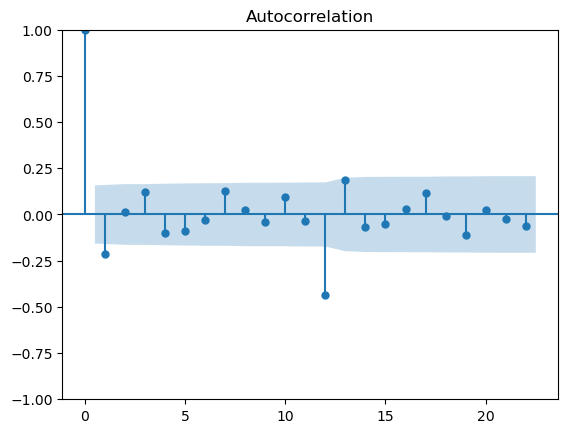

In [36]:
fig_seasonal_first = plot_acf(df["first seasonal difference"].dropna())

In [37]:
from pandas.plotting import autocorrelation_plot

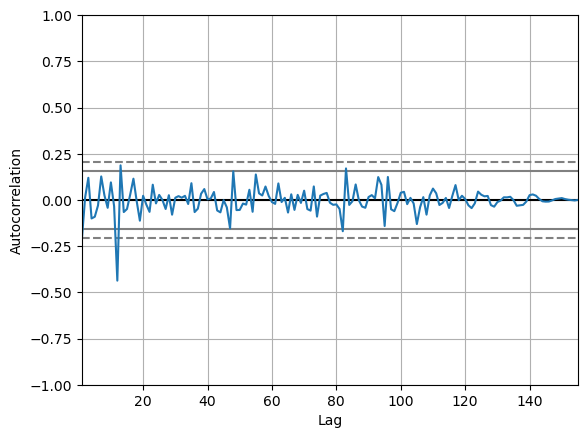

In [38]:
frst= autocorrelation_plot(df["first seasonal difference"].dropna())

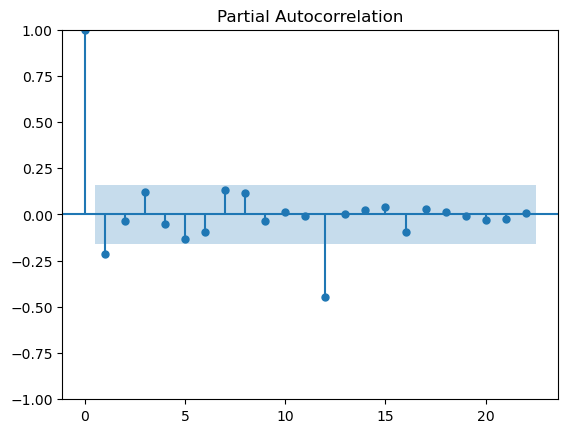

In [39]:
fig_seasonal_first_pacf = plot_pacf(df["first seasonal difference"].dropna())

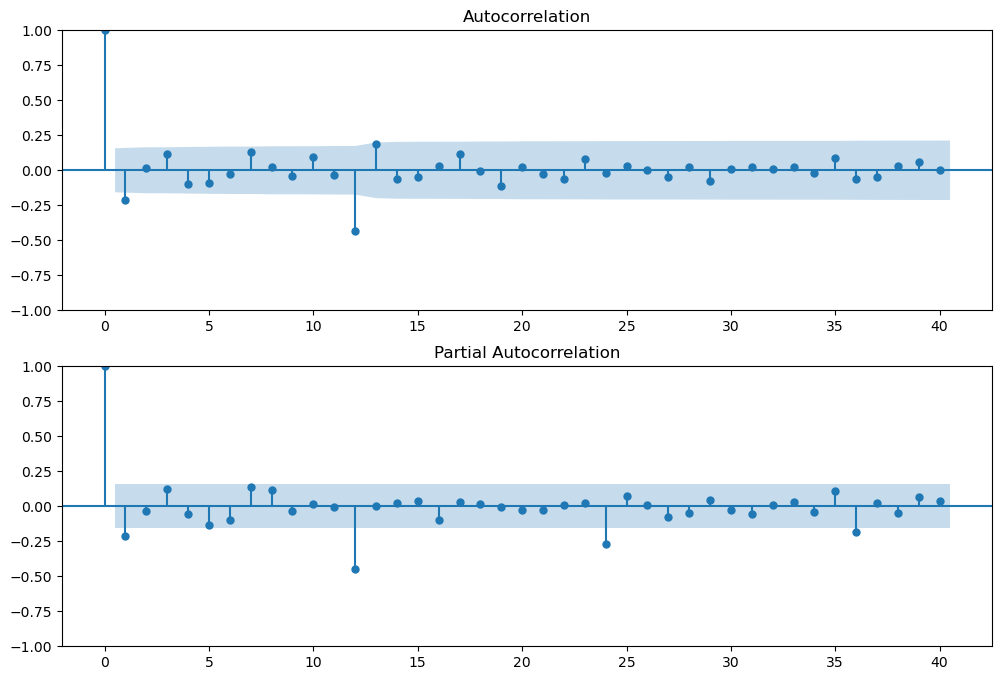

In [40]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["first seasonal difference"].iloc[13:],lags = 40,ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["first seasonal difference"].iloc[13:],lags = 40, ax = ax2)

### Arima 

In [41]:
from statsmodels.tsa.arima_model import ARIMA 

In [42]:
model = sm.tsa.statespace.SARIMAX(df['Milk in pounds per cow'],order = (0,1,0),seasonal_order = (1,1,1,12))

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [43]:
results = model.fit()

In [44]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:               Milk in pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Sun, 11 Feb 2024   AIC                           1074.131
Time:                                      11:05:48   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

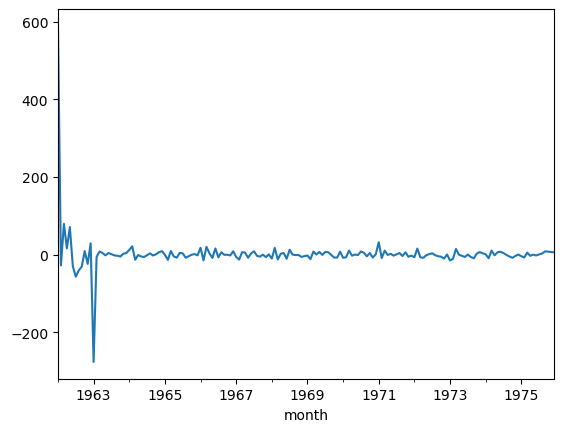

In [45]:
results.resid.plot()
plt.show()

In [46]:
df["forecast"]= results.predict()
df["forecast"]

month
1962-01-01      0.000000
1962-02-01    589.000000
1962-03-01    561.000000
1962-04-01    640.000000
1962-05-01    656.000000
                 ...    
1975-08-01    855.358648
1975-09-01    808.841372
1975-10-01    819.323185
1975-11-01    790.427530
1975-12-01    837.063622
Name: forecast, Length: 168, dtype: float64

<Axes: xlabel='month'>

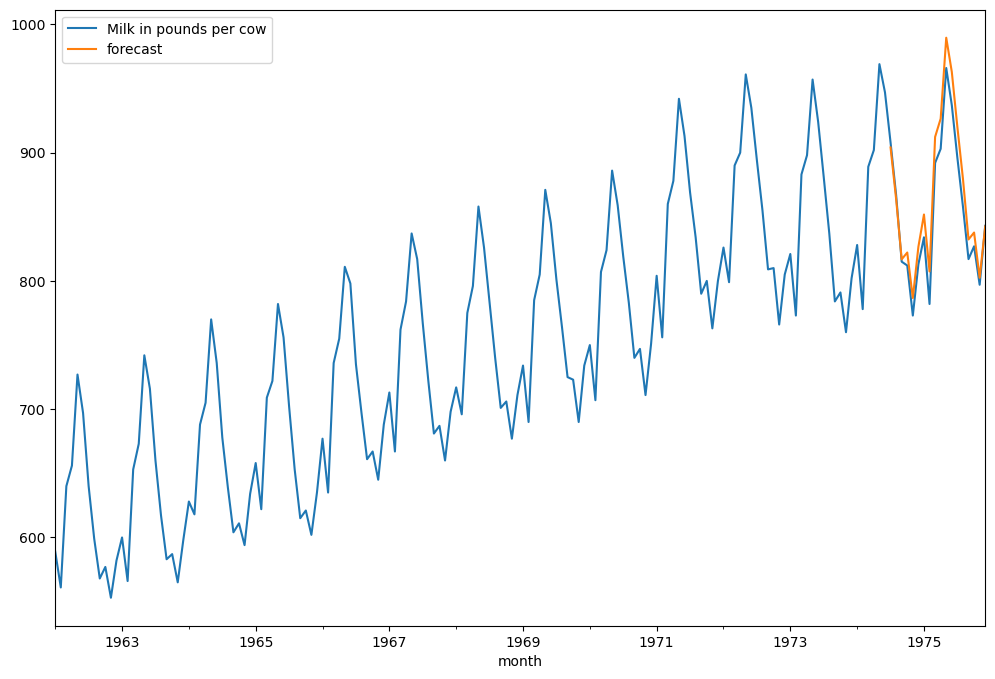

In [47]:
df['forecast'] = results.predict(start = 150,end = 168,dynamic = True)  
df[['Milk in pounds per cow','forecast']].plot(figsize = (12, 8))

In [48]:
df[["Milk in pounds per cow","forecast"]].tail(10)

,Milk in pounds per cow,forecast
month,,
1975-03-01,892.0,912.267844
1975-04-01,903.0,926.505912
1975-05-01,966.0,989.604711
1975-06-01,937.0,962.944934
1975-07-01,896.0,919.999546
1975-08-01,858.0,879.668975
1975-09-01,817.0,832.328554
1975-10-01,827.0,837.722250
1975-11-01,797.0,802.452737


### To create index of future timestamp

In [49]:
from pandas.tseries.offsets import DateOffset

In [50]:
future_data = [df.index[-1] + DateOffset(months = x) for x in range(0,24)]

In [51]:
future_data

[Timestamp('1975-12-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [52]:
df_forecast = pd.DataFrame (index= future_data[1:], columns = df.columns)
df_forecast

,Milk in pounds per cow,milk first difference,seasonal difference,first seasonal difference,forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN,NaN
1976-09-01,NaN,NaN,NaN,NaN,NaN
1976-10-01,NaN,NaN,NaN,NaN,NaN


In [53]:
df_forecast.shape

(23, 5)

### Concatinating the df data frame and df_forecast dataframe

In [54]:
df_future = pd.concat([df,df_forecast])
df_future

,Milk in pounds per cow,milk first difference,seasonal difference,first seasonal difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN
1962-03-01,640.0,79.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,NaN,NaN,NaN
...,...,...,...,...,...
1977-07-01,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN


In [55]:
df_future.head()

,Milk in pounds per cow,milk first difference,seasonal difference,first seasonal difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN
1962-03-01,640.0,79.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,NaN,NaN,NaN


In [56]:
df_future.tail()

,Milk in pounds per cow,milk first difference,seasonal difference,first seasonal difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN


In [57]:
df.shape

(168, 5)

In [58]:
df_future["forecast"]=results.predict(start = 168, end = 188,dynamic= True)


<Axes: >

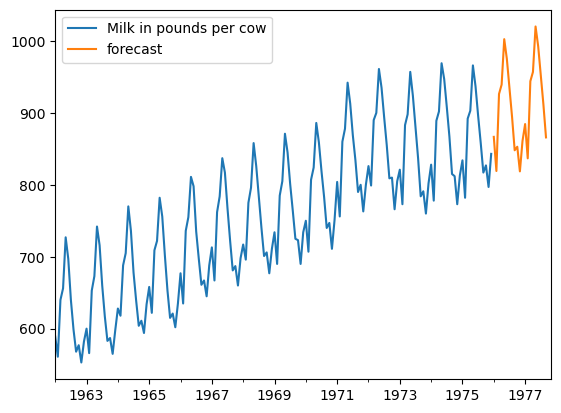

In [59]:
df_future[["Milk in pounds per cow","forecast"]].plot()

## we can see that we have predicted the amount of count that cows can produce in future along with time (years)

## Each Cows can produce more than 1000 pounds of milk